## Project #2- Diabetes Readmission Model 

In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame and make the index the "readmitted" column.
readmission_data_df = pd.read_csv("Resources/diabetic_data.csv", index_col="readmitted")

# Display sample data
readmission_data_df.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
readmitted,,,,,,,,,,,,,,,,,,,,,
NO,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,No
>30,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,No,Up,No,No,No,No,No,Ch,Yes
NO,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,No,Yes
NO,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,No,Up,No,No,No,No,No,Ch,Yes
NO,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,No,Steady,No,No,No,No,No,Ch,Yes
>30,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,No,Steady,No,No,No,No,No,No,Yes
NO,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,No,Steady,No,No,No,No,No,Ch,Yes
>30,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,No,Yes
NO,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,No,Steady,No,No,No,No,No,Ch,Yes


In [3]:
# Generate summary statistics
readmission_data_df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


Information 

In [4]:
readmission_data_df.info

<bound method DataFrame.info of             encounter_id  patient_nbr             race  gender      age  \
readmitted                                                                
NO               2278392      8222157        Caucasian  Female   [0-10)   
>30               149190     55629189        Caucasian  Female  [10-20)   
NO                 64410     86047875  AfricanAmerican  Female  [20-30)   
NO                500364     82442376        Caucasian    Male  [30-40)   
NO                 16680     42519267        Caucasian    Male  [40-50)   
...                  ...          ...              ...     ...      ...   
>30            443847548    100162476  AfricanAmerican    Male  [70-80)   
NO             443847782     74694222  AfricanAmerican  Female  [80-90)   
NO             443854148     41088789        Caucasian    Male  [70-80)   
NO             443857166     31693671        Caucasian  Female  [80-90)   
NO             443867222    175429310        Caucasian    Male  [70-

In [5]:
readmission_data_df.value_counts

<bound method DataFrame.value_counts of             encounter_id  patient_nbr             race  gender      age  \
readmitted                                                                
NO               2278392      8222157        Caucasian  Female   [0-10)   
>30               149190     55629189        Caucasian  Female  [10-20)   
NO                 64410     86047875  AfricanAmerican  Female  [20-30)   
NO                500364     82442376        Caucasian    Male  [30-40)   
NO                 16680     42519267        Caucasian    Male  [40-50)   
...                  ...          ...              ...     ...      ...   
>30            443847548    100162476  AfricanAmerican    Male  [70-80)   
NO             443847782     74694222  AfricanAmerican  Female  [80-90)   
NO             443854148     41088789        Caucasian    Male  [70-80)   
NO             443857166     31693671        Caucasian  Female  [80-90)   
NO             443867222    175429310        Caucasian    Ma

In [6]:
readmission_data_df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

## Cleaning up the data

In [7]:
# Drop columns that won't be used

readmission_data_df = readmission_data_df.drop(['race','encounter_id','patient_nbr','weight','medical_specialty','payer_code','discharge_disposition_id','gender','age','diag_1','diag_2','diag_3','admission_type_id','max_glu_serum'], axis=1)


In [8]:
#Using OneHotEncoder
insulin_OHE = OneHotEncoder(handle_unknown='ignore', sparse_output=False, dtype='int')
insulin_OHE.fit(readmission_data_df[['insulin']])
insulin_encoded = insulin_OHE.transform(readmission_data_df[['insulin']])

In [9]:
insulin_column_names = insulin_OHE.get_feature_names_out()
readmission_data_df[insulin_column_names] = insulin_encoded
readmission_data_df = readmission_data_df.drop(columns=['insulin'])
readmission_data_df.head()

,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,A1Cresult,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,insulin_Down,insulin_No,insulin_Steady,insulin_Up
readmitted,,,,,,,,,,,,,,,,,,,,,
NO,1,1,41,0,1,0,0,0,1,NaN,...,No,No,No,No,No,No,0,1,0,0
>30,7,3,59,0,18,0,0,0,9,NaN,...,No,No,No,No,Ch,Yes,0,0,0,1
NO,7,2,11,5,13,2,0,1,6,NaN,...,No,No,No,No,No,Yes,0,1,0,0
NO,7,2,44,1,16,0,0,0,7,NaN,...,No,No,No,No,Ch,Yes,0,0,0,1
NO,7,1,51,0,8,0,0,0,5,NaN,...,No,No,No,No,Ch,Yes,0,0,1,0


In [10]:
readmission_data_df = readmission_data_df.reset_index()

In [11]:
# Adjusting the text to zeros and ones

readmission_data_df['citoglipton'] = readmission_data_df['citoglipton'].replace(['No'], '0')
readmission_data_df['glyburide-metformin'] = readmission_data_df['glyburide-metformin'].replace(['No'], '0')
readmission_data_df['glipizide-metformin'] = readmission_data_df['glipizide-metformin'].replace(['No'], '0')
readmission_data_df['glimepiride-pioglitazone'] = readmission_data_df['glimepiride-pioglitazone'].replace(['No'], '0')
readmission_data_df['metformin-rosiglitazone'] = readmission_data_df['metformin-rosiglitazone'].replace(['No'], '0')
readmission_data_df['metformin-pioglitazone'] = readmission_data_df['metformin-pioglitazone'].replace(['No'], '0')
readmission_data_df['readmitted'] = readmission_data_df['readmitted'].replace(['NO', '>30', '<30'],['0', '1', '-1'])
readmission_data_df['change'] = readmission_data_df['change'].replace(['No'], '0')
readmission_data_df['change'] = readmission_data_df['change'].replace(['Ch'], '1')
readmission_data_df['diabetesMed'] = readmission_data_df['change'].replace(['No'], '0')
readmission_data_df['diabetesMed'] = readmission_data_df['change'].replace(['Yes'], '1')
citoglipton_slice = readmission_data_df['citoglipton'].copy()
readmission_data_df.head()
readmission_data_df.tail()

,readmitted,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,insulin_Down,insulin_No,insulin_Steady,insulin_Up
101761,1,7,3,51,0,16,0,0,0,9,...,0,0,0,0,1,1,1,0,0,0
101762,0,5,5,33,3,18,0,0,1,9,...,0,0,0,0,0,0,0,0,1,0
101763,0,7,1,53,0,9,1,0,0,13,...,0,0,0,0,1,1,1,0,0,0
101764,0,7,10,45,2,21,0,0,1,9,...,0,0,0,0,1,1,0,0,0,1
101765,0,7,6,13,3,3,0,0,0,9,...,0,0,0,0,0,0,0,1,0,0


In [12]:
readmission_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 39 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   readmitted                101766 non-null  object
 1   admission_source_id       101766 non-null  int64 
 2   time_in_hospital          101766 non-null  int64 
 3   num_lab_procedures        101766 non-null  int64 
 4   num_procedures            101766 non-null  int64 
 5   num_medications           101766 non-null  int64 
 6   number_outpatient         101766 non-null  int64 
 7   number_emergency          101766 non-null  int64 
 8   number_inpatient          101766 non-null  int64 
 9   number_diagnoses          101766 non-null  int64 
 10  A1Cresult                 17018 non-null   object
 11  metformin                 101766 non-null  object
 12  repaglinide               101766 non-null  object
 13  nateglinide               101766 non-null  object
 14  chlo

In [13]:
#More columns dropped 
colums_to_drop = [ 'A1Cresult'
                 , 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide'
                 , 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide'
                 , 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone'
                 , 'tolazamide', 'examide', 'citoglipton'
                 , 'glyburide-metformin', 'glipizide-metformin'
                 , 'glimepiride-pioglitazone', 'metformin-rosiglitazone'
                 , 'metformin-pioglitazone']
readmission_data_df = readmission_data_df.drop(columns=colums_to_drop)


In [14]:
readmission_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   readmitted           101766 non-null  object
 1   admission_source_id  101766 non-null  int64 
 2   time_in_hospital     101766 non-null  int64 
 3   num_lab_procedures   101766 non-null  int64 
 4   num_procedures       101766 non-null  int64 
 5   num_medications      101766 non-null  int64 
 6   number_outpatient    101766 non-null  int64 
 7   number_emergency     101766 non-null  int64 
 8   number_inpatient     101766 non-null  int64 
 9   number_diagnoses     101766 non-null  int64 
 10  change               101766 non-null  object
 11  diabetesMed          101766 non-null  object
 12  insulin_Down         101766 non-null  int64 
 13  insulin_No           101766 non-null  int64 
 14  insulin_Steady       101766 non-null  int64 
 15  insulin_Up           101766 non-nu

In [15]:
# Using OneHotEncoder for readmitted, change and diabetes med columns 
readmitted_OHE = OneHotEncoder(handle_unknown='ignore', sparse_output=False, dtype='int')
readmitted_OHE.fit(readmission_data_df[['readmitted']])
readmitted_encoded = readmitted_OHE.transform(readmission_data_df[['readmitted']])

change_OHE = OneHotEncoder(handle_unknown='ignore', sparse_output=False, dtype='int')
change_OHE.fit(readmission_data_df[['change']])
change_OHE_encoded = change_OHE.transform(readmission_data_df[['change']])

diabetesMed_OHE = OneHotEncoder(handle_unknown='ignore', sparse_output=False, dtype='int')
diabetesMed_OHE.fit(readmission_data_df[['diabetesMed']])
diabetesMed_OHE_encoded = diabetesMed_OHE.transform(readmission_data_df[['diabetesMed']])

In [16]:
readmitted_column_names = readmitted_OHE.get_feature_names_out()
readmission_data_df[readmitted_column_names] = readmitted_encoded
readmission_data_df.head()

,readmitted,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed,insulin_Down,insulin_No,insulin_Steady,insulin_Up,readmitted_-1,readmitted_0,readmitted_1
0,0,1,1,41,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
1,1,7,3,59,0,18,0,0,0,9,1,1,0,0,0,1,0,0,1
2,0,7,2,11,5,13,2,0,1,6,0,0,0,1,0,0,0,1,0
3,0,7,2,44,1,16,0,0,0,7,1,1,0,0,0,1,0,1,0
4,0,7,1,51,0,8,0,0,0,5,1,1,0,0,1,0,0,1,0


In [17]:
change_column_names = change_OHE.get_feature_names_out()
readmission_data_df[change_column_names] = change_OHE_encoded
readmission_data_df.head()

,readmitted,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,diabetesMed,insulin_Down,insulin_No,insulin_Steady,insulin_Up,readmitted_-1,readmitted_0,readmitted_1,change_0,change_1
0,0,1,1,41,0,1,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
1,1,7,3,59,0,18,0,0,0,9,...,1,0,0,0,1,0,0,1,0,1
2,0,7,2,11,5,13,2,0,1,6,...,0,0,1,0,0,0,1,0,1,0
3,0,7,2,44,1,16,0,0,0,7,...,1,0,0,0,1,0,1,0,0,1
4,0,7,1,51,0,8,0,0,0,5,...,1,0,0,1,0,0,1,0,0,1


In [18]:
diabetesMed_column_names = diabetesMed_OHE.get_feature_names_out()
readmission_data_df[diabetesMed_column_names] = diabetesMed_OHE_encoded
readmission_data_df.head()

,readmitted,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,insulin_No,insulin_Steady,insulin_Up,readmitted_-1,readmitted_0,readmitted_1,change_0,change_1,diabetesMed_0,diabetesMed_1
0,0,1,1,41,0,1,0,0,0,1,...,1,0,0,0,1,0,1,0,1,0
1,1,7,3,59,0,18,0,0,0,9,...,0,0,1,0,0,1,0,1,0,1
2,0,7,2,11,5,13,2,0,1,6,...,1,0,0,0,1,0,1,0,1,0
3,0,7,2,44,1,16,0,0,0,7,...,0,0,1,0,1,0,0,1,0,1
4,0,7,1,51,0,8,0,0,0,5,...,0,1,0,0,1,0,0,1,0,1


In [19]:
readmission_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   readmitted           101766 non-null  object
 1   admission_source_id  101766 non-null  int64 
 2   time_in_hospital     101766 non-null  int64 
 3   num_lab_procedures   101766 non-null  int64 
 4   num_procedures       101766 non-null  int64 
 5   num_medications      101766 non-null  int64 
 6   number_outpatient    101766 non-null  int64 
 7   number_emergency     101766 non-null  int64 
 8   number_inpatient     101766 non-null  int64 
 9   number_diagnoses     101766 non-null  int64 
 10  change               101766 non-null  object
 11  diabetesMed          101766 non-null  object
 12  insulin_Down         101766 non-null  int64 
 13  insulin_No           101766 non-null  int64 
 14  insulin_Steady       101766 non-null  int64 
 15  insulin_Up           101766 non-nu

## Scalling the data 

In [20]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
readmission_data_df_scaled = StandardScaler().fit_transform(readmission_data_df)

## Clustering Data 

In [21]:
readmission_pca=PCA(n_components=2)
readmission_data_pca = readmission_pca.fit_transform(readmission_data_df)
readmission_pca.explained_variance_ratio_

array([0.79998357, 0.12736016])

Approximately 92% of the total variance is condensed into 2 PCA variables 

In [22]:
readmission_data_pca

array([[ -4.39616558, -15.12024939],
       [ 15.96502539,  -0.54466   ],
       [-32.28142723,   1.26958218],
       ...,
       [  8.80146752,  -8.52592148],
       [  2.88210672,   5.59574665],
       [-31.37624918,  -8.09368676]])

In [23]:
# Create the PCA DataFrame
readmission_pca_df = pd.DataFrame(
    readmission_data_pca,
    columns=["PCA1", "PCA2"]
)
readmission_pca_df

,PCA1,PCA2
0,-4.396166,-15.120249
1,15.965025,-0.544660
2,-32.281427,1.269582
3,0.776275,-0.596795
4,6.559360,-9.689556
...,...,...
101761,7.784022,-1.376488
101762,-9.674339,3.646968
101763,8.801468,-8.525921
101764,2.882107,5.595747


In [24]:
# A list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))

# A for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the service_ratings DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=0)
    k_model.fit(readmission_pca_df)
    inertia.append(k_model.inertia_)

# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}

# Create the DataFrame from the elbow data
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

,k,inertia
0,1,4.646984e+07
1,2,2.112694e+07
2,3,1.305817e+07
3,4,1.032463e+07
4,5,8.497824e+06


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

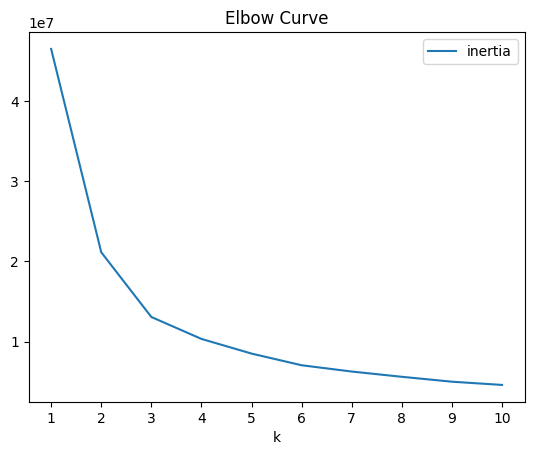

In [25]:
# Plot the DataFrame
df_elbow.plot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k)

# #Segment the DataFrame using K-Means 

In [26]:
# Define the model Kmeans model using the optimal value of k for the number of clusters.
readmission_model = KMeans(n_clusters=3, n_init='auto', random_state=0)

# Fit the model
readmission_model.fit(readmission_pca_df)

# Make predictions
k_3 = readmission_model.predict(readmission_pca_df)

# Create a copy of the readmission_pca_df DataFrame
readmission_pca_predictions_df = readmission_pca_df.copy()

# Add a class column with the labels
readmission_pca_predictions_df["customer_segments"] = k_3

<Axes: xlabel='PCA1', ylabel='PCA2'>

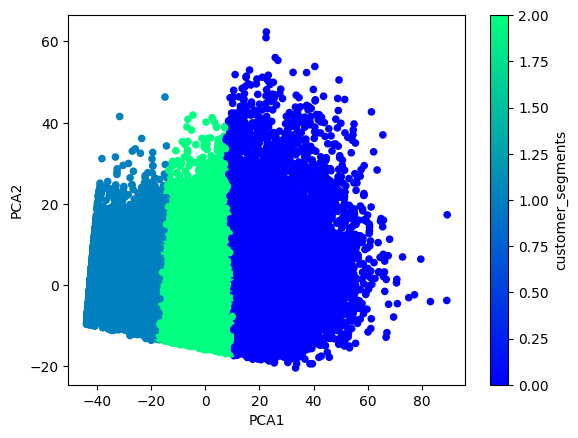

In [27]:
# Plot the clusters
readmission_pca_predictions_df.plot.scatter(
    x="PCA1",
    y="PCA2",
    c="customer_segments",
    colormap='winter')

Through my data analysis, I found that my data did not form definitive clusters. By viewing the scatterplot above, it is apparent the K-means was not able to cluster the data into set clusters. Therefore, supervisied learning models would be more effective with my data, compared to unsupervisied models.   

# Supervisied Learning Models

In [28]:
# Create the labels set `y` and features DataFrame `X`
#features DataFrame `X`
X = readmission_data_df.copy()
X = readmission_data_df.drop(columns= "readmitted")

#Get the target column (y)
y = readmission_data_df["readmitted"]
y.head()

0    0
1    1
2    0
3    0
4    0
Name: readmitted, dtype: object

In [29]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Scale the data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
readmission_data_df_scaled = StandardScaler().fit_transform(readmission_data_df)

In [31]:
# Train the Random Forest model
clf = RandomForestClassifier(random_state=78, n_estimators=500).fit(X_train_scaled, y_train)

# Evaluate the model
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 1.0


 It appears that my model using RandomForest is overfit. I did try to change the random states and estimators. However I still got the same results.

In [32]:
# Make predictions using the testing data
predictions = clf.predict(X_test)

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [33]:
# Calculate the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [34]:
# Display results
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.5609228834211147


It appears that my model is not very accurate and has completely overfit the data. I will try other models and evaluate the results.

# Extremely Random Trees Classifier


In [35]:
# Import an Extremely Random Trees classifier
from sklearn.ensemble import ExtraTreesClassifier

In [36]:
# Train the ExtraTreesClassifier model
model_2 = ExtraTreesClassifier(random_state=1).fit(X_train_scaled, y_train)

# Evaluate the model
print(f'Training Score: {model_2.score(X_train_scaled, y_train)}')
print(f'Testing Score: {model_2.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 1.0


My model is once again overfit. I will continue to try to assess my data using other models. 

In [37]:
# Make predictions using the testing data
predictions_2 = model_2.predict(X_test)
# Calculate the accuracy score
acc_score_2 = accuracy_score(y_test, predictions_2)


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  warnings.warn(


In [38]:
# Display results
print(f"Accuracy Score : {acc_score_2}")

Accuracy Score : 0.8916751827686502


# Gradient Boosting Classifier

In [39]:
# Import Gradient Boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

In [40]:
# Train the Gradient Boosting classifier
model_3 = GradientBoostingClassifier(random_state=1).fit(X_train_scaled, y_train)

# Evaluate the model
print(f'Training Score: {model_3.score(X_train_scaled, y_train)}')
print(f'Testing Score: {model_3.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 1.0


In [41]:
# Make predictions using the testing data
predictions_3 = model_3.predict(X_test)

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


In [42]:
# Calculate the accuracy score
acc_score_3 = accuracy_score(y_test, predictions_3)
# Display results
print(f"Accuracy Score : {acc_score_3}")

Accuracy Score : 0.543432120116343


I attempted to use Gradient Boosting Classifier to try to improve the accuracy of my model. Gadient boosting can be used to train a model sequentially and attempts to correct a previous model (https://www.geeksforgeeks.org/ml-gradient-boosting/). Unfortunately, this did not improve my overall model. 

# Adaptive Boosting Classifier 

In [43]:
# Import an Adaptive Boosting classifier
from sklearn.ensemble import AdaBoostClassifier

In [44]:
# Train the AdaBoostClassifier
model_4 = AdaBoostClassifier(random_state=1).fit(X_train_scaled, y_train)

# Evaluate the model
print(f'Training Score: {model_4.score(X_train_scaled, y_train)}')
print(f'Testing Score: {model_4.score(X_test_scaled, y_test)}')

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training Score: 1.0
Testing Score: 1.0


In [45]:
# Make predictions using the testing data
predictions_4 = model_4.predict(X_test)
# Calculate the accuracy score
acc_score_4 = accuracy_score(y_test, predictions_4)
# Display results
print(f"Accuracy Score : {acc_score_4}")

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


Accuracy Score : 0.543432120116343


# Result Analysis 
My model is overfit in every classifier I used. This could be due to my data, how I scaled my data, as well as the models that I tried to use. To decrease overfitting I could train with more data or apply different classifer models. Applying nerual network models could potentially increase the accuracy of my model. In addition, it could be the dataset that is limting as well. Further investigate would need to be implemented in order to build a more proficient model. 

Extra Trees Classifier provided the highest accuracy score of all the models that I explored, with an accuracy of 89.2%. This type of classifier adds additional decision trees on subsamples and uses averages to improve the accuracy of the model (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html). The other models that I implemented had accuracy scores in the 50's. If I were to explore additional models, I would apply my data to other classifiers similar to Extra Trees to see if my model could improve. 